<a href="https://colab.research.google.com/github/nilperez/British-Airways-customer-reviews/blob/main/Task2/ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory data analysis
### Análisis Exploratorio de Datos
First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

En primer lugar, exploramos los datos para entender mejor qué tenemos y las propiedades estadísticas del conjunto de datos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("/content/drive/MyDrive/BA/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49203 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49203 non-null  int64  
 1   sales_channel          49203 non-null  object 
 2   trip_type              49203 non-null  object 
 3   purchase_lead          49203 non-null  int64  
 4   length_of_stay         49203 non-null  int64  
 5   flight_hour            49203 non-null  int64  
 6   flight_day             49203 non-null  int64  
 7   route                  49203 non-null  int64  
 8   booking_origin         49203 non-null  object 
 9   wants_extra_baggage    49203 non-null  int64  
 10  wants_preferred_seat   49203 non-null  int64  
 11  wants_in_flight_meals  49203 non-null  int64  
 12  flight_duration        49203 non-null  float64
 13  booking_complete       49203 non-null  int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 5.6+ MB


## Data Dictionary
### Diccionario de datos
- `num_passengers` = number of passengers travelling / número de pasajeros que viajan
- `sales_channel` = sales channel booking was made on / canal de ventas en el que se realizó la reserva
- `trip_type` = trip Type / tipo de viaje (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date / número de días entre la fecha de viaje y la fecha de reserva
- `length_of_stay` = number of days spent at destination / número de días pasados en el destino
- `flight_hour` = hour of flight departure / hora de salida del vuelo
- `flight_day` = day of week of flight departure / día de la semana de la salida del vuelo
- `route` = origin -> destination flight route / ruta de vuelo de origen -> destino
- `booking_origin` = country from where booking was made / país desde donde se realizó la reserva
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking / si el cliente quería equipaje adicional en la reserva
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking / si el cliente quería un asiento preferencial en la reserva
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking / si el cliente quería comidas en el vuelo en la reserva
- `flight_duration` = total duration of flight (in hours) / duración total del vuelo (en horas)
- `booking_complete` = flag indicating if the customer completed the booking / indicador de si el cliente completó la reserva



In [14]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [32]:
# Mapping days from string to int / Mapeamos los días de string a int
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
# Statistical summary of the dataset / Resumen estadístico del dataset

df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


##Data Cleaning
###Limpieza de datos

In [16]:
# Check for missing values / Identificamos valores faltantes
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [17]:
# Checking for duplicates / Identificamos datos duplicados
df.duplicated().sum()

719

In [33]:
# Dropping duplicates / Eliminamos duplicados
df.drop_duplicates(inplace=True)

In [34]:
# Calculating z-scores for flight duration / Calculamos los z-scores para la duración del vuelo
z_scores = stats.zscore(df['flight_duration'])
abs_z_scores = np.abs(z_scores)

In [35]:
# Filtering out entries where absolute z-scores are less than 3 / Filtramos las entradas donde los z-scores absolutos son menores que 3
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

In [21]:
# Checking unique sales channels / Verificamos los canales de ventas únicos
unique_sales_channels = df['sales_channel'].unique()
print(unique_sales_channels)

['Internet' 'Mobile']


In [22]:
# Checking unique booking origins / Verificamos los orígenes de reserva únicos
unique_booking_origins = df['booking_origin'].unique()
print(unique_booking_origins)

['New Zealand' 'India' 'United Kingdom' 'China' 'South Korea' 'Japan'
 'Malaysia' 'Singapore' 'Switzerland' 'Germany' 'Indonesia'
 'Czech Republic' 'Vietnam' 'Thailand' 'Spain' 'Romania' 'Ireland' 'Italy'
 'Slovakia' 'United Arab Emirates' 'Tonga' 'Réunion' '(not set)'
 'Saudi Arabia' 'Netherlands' 'Qatar' 'Hong Kong' 'Philippines'
 'Sri Lanka' 'France' 'Croatia' 'United States' 'Laos' 'Hungary'
 'Portugal' 'Cyprus' 'Australia' 'Cambodia' 'Poland' 'Belgium' 'Oman'
 'Bangladesh' 'Kazakhstan' 'Brazil' 'Turkey' 'Kenya' 'Taiwan' 'Brunei'
 'Chile' 'Bulgaria' 'Ukraine' 'Denmark' 'Colombia' 'Iran' 'Bahrain'
 'Solomon Islands' 'Slovenia' 'Mauritius' 'Nepal' 'Russia' 'Kuwait'
 'Mexico' 'Sweden' 'Austria' 'Lebanon' 'Jordan' 'Greece' 'Mongolia'
 'Canada' 'Tanzania' 'Peru' 'Timor-Leste' 'Argentina' 'New Caledonia'
 'Macau' 'Myanmar (Burma)' 'Norway' 'Panama' 'Bhutan' 'Norfolk Island'
 'Finland' 'Nicaragua' 'Maldives' 'Egypt' 'Israel' 'Tunisia'
 'South Africa' 'Papua New Guinea' 'Paraguay' 'Estonia

In [36]:
# Counting occurrences of "(not set)" in booking origins / Contamos las ocurrencias de "(not set)" en los orígenes de reserva
not_set_count = (df['booking_origin'] == "(not set)").sum()
print(not_set_count)

78


In [37]:
# Dropping rows with booking origin as "(not set)" / Eliminamos filas con origen de reserva como "(not set)"
df = df.drop(df[df['booking_origin'] == "(not set)"].index)

In [38]:
# Contar el número de filas con valores menores que 0 en la columna 'num_passengers'
num_negatives = df[df['num_passengers'] < 0].shape[0]

# Imprimir el resultado
print("Número de filas con valores negativos en 'num_passengers':", num_negatives)


Número de filas con valores negativos en 'num_passengers': 0


In [39]:
# Checking constraints for num_passengers / Verificamos las restricciones para num_passengers
df.loc[df['num_passengers'] < 0, 'num_passengers'] = 0

## Checking for outliers in numerical columns
### Buscamos outliers en las columnas numéricas

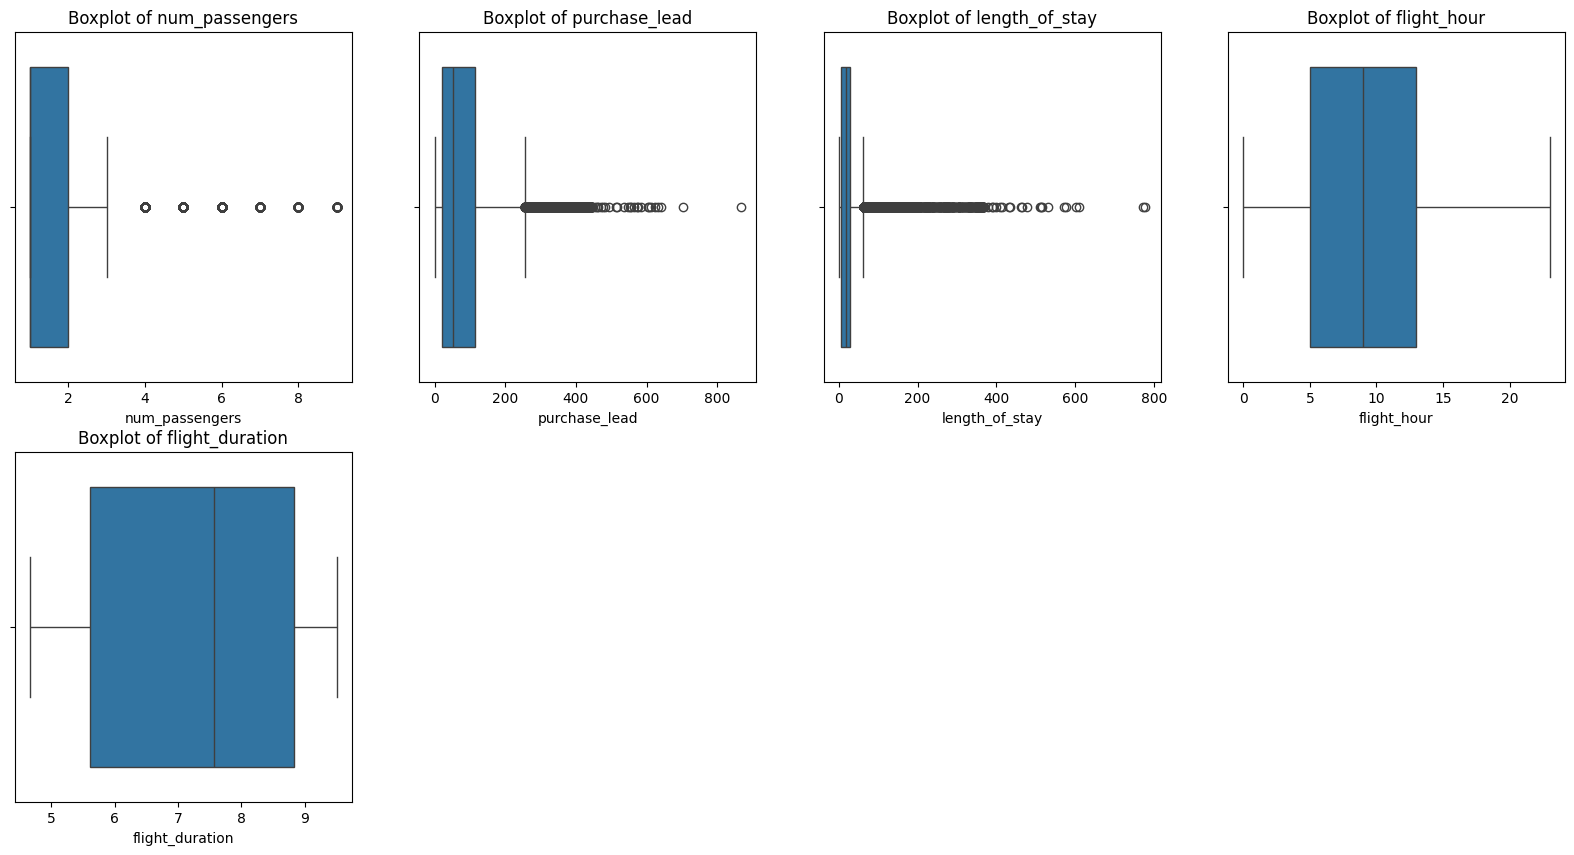

In [41]:
# Select only the numerical columns and create subplots for each one / Seleccionamos las columnas numéricas y creamos un subplot para cada una
numerical_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

# Flatten the axis array / Aplana el arreglo de ejes
axs = axs.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_title(f'Boxplot of {col}')

# Hide any unused subplots / Escondemos los subplots no usados
for i in range(len(numerical_cols), len(axs)):
    axs[i].axis('off')

In [ ]:
print("Shape before removing outliers:", df.shape)

Shape before removing outliers: (49203, 14)


##Shaping the data using IQR
### Dar forma a los datos utilizando el rango intercuartílico (IQR).
The outliers in `purchase_lead` and `length_of_stay` are invalid data points, one approach to remove them is to use the Interquartile Range (IQR) method. traduce

Los valores atípicos en `purchase_lead` y `length_of_stay` son puntos de datos inválidos, una manera de eliminarlos es utilizar el método del rango intercuartílico (IQR)."

In [42]:
# Calculate the IQR / Calculamos el rango intercuartílico
q1 = df['purchase_lead'].quantile(0.25)
q3 = df['purchase_lead'].quantile(0.75)
iqr = q3 - q1

# Calculate the upper and lower bounds / Calculamos los límites superior e inferior
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Remove outliers / Eliminamos outliers
df = df[(df['purchase_lead'] >= lower_bound) & (df['purchase_lead'] <= upper_bound)]

In [43]:
# Calculate the IQR / Calculamos el rango intercuartílico
q1 = df['length_of_stay'].quantile(0.25)
q3 = df['length_of_stay'].quantile(0.75)
iqr = q3 - q1

# Calculate the upper and lower bounds / Calculamos los límites superior e inferior
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Remove outliers / Eliminamos outliers
df = df[(df['length_of_stay'] >= lower_bound) & (df['length_of_stay'] <= upper_bound)]

In [ ]:
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (42427, 14)


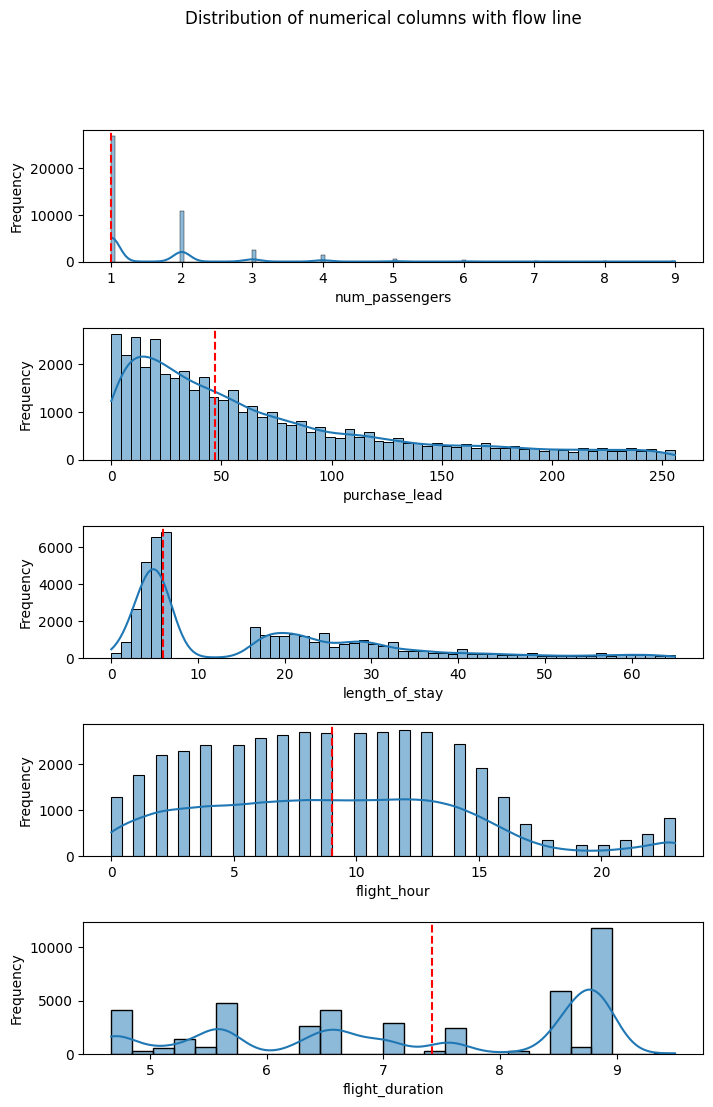

In [44]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))

# Plot the histograms with density plots / Graficamos los histogramas con gráficos de densidad
sns.histplot(ax=axes[0], data=df, x='num_passengers', kde=True)
sns.histplot(ax=axes[1], data=df, x='purchase_lead', kde=True)
sns.histplot(ax=axes[2], data=df, x='length_of_stay', kde=True)
sns.histplot(ax=axes[3], data=df, x='flight_hour', kde=True)
sns.histplot(ax=axes[4], data=df, x='flight_duration', kde=True)

# Add a line indicating the flow of the distribution / Agregamos una línea para indicar el flujo de la distribución
for ax in axes:
    ax.axvline(df[ax.get_xlabel()].median(), color='red', linestyle='dashed')
    ax.set_ylabel('Frequency')

fig.suptitle('Distribution of numerical columns with flow line')

plt.subplots_adjust(hspace=0.5)

plt.show()

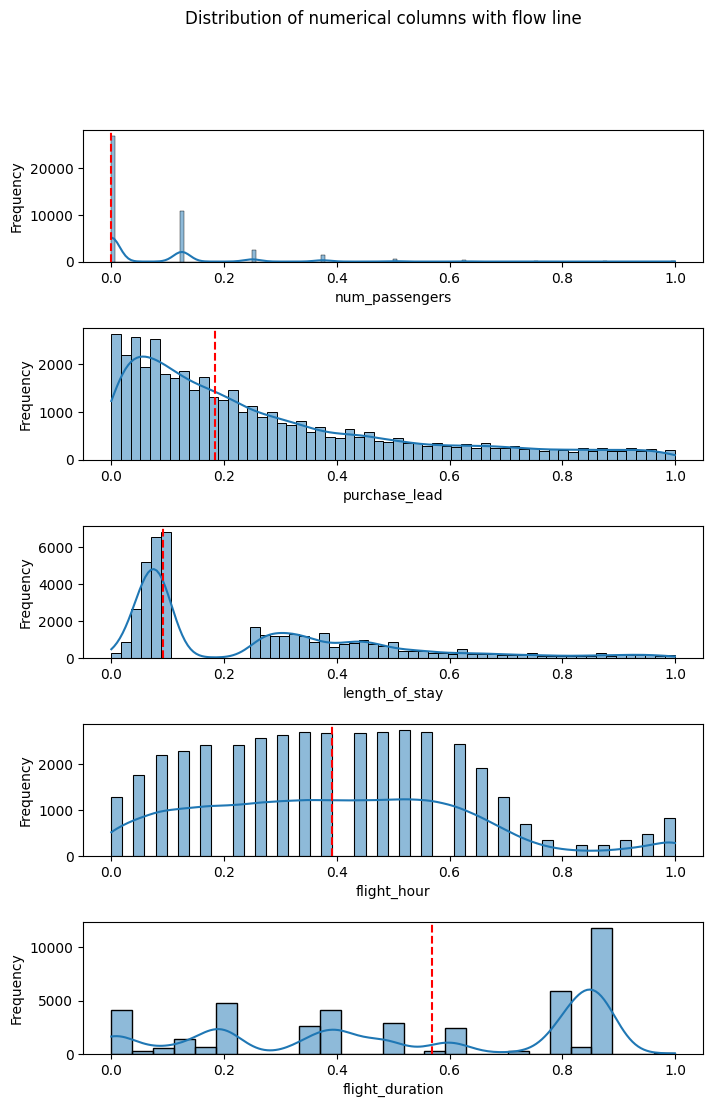

In [45]:
from sklearn.preprocessing import MinMaxScaler

num_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

# Normalize the numerical columns / Normalizamos las columnas numéricas
df_num = df[num_cols].copy()

scaler = MinMaxScaler()
df_num[num_cols] = scaler.fit_transform(df_num[num_cols])

# Plot the distributions / Graficamos las distribuciones

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))

sns.histplot(ax=axes[0], data=df_num, x='num_passengers', kde=True)
sns.histplot(ax=axes[1], data=df_num, x='purchase_lead', kde=True)
sns.histplot(ax=axes[2], data=df_num, x='length_of_stay', kde=True)
sns.histplot(ax=axes[3], data=df_num, x='flight_hour', kde=True)
sns.histplot(ax=axes[4], data=df_num, x='flight_duration', kde=True)

for ax in axes:
    ax.axvline(df_num[ax.get_xlabel()].median(), color='red', linestyle='dashed')
    ax.set_ylabel('Frequency')

fig.suptitle('Distribution of numerical columns with flow line')

plt.subplots_adjust(hspace=0.5)

plt.show()

In [46]:
df['booking_origin'].value_counts()

booking_origin
Australia               15469
Malaysia                 5770
South Korea              3982
Japan                    3450
China                    3042
                        ...  
Lebanon                     1
Nicaragua                   1
Jordan                      1
Tanzania                    1
Svalbard & Jan Mayen        1
Name: count, Length: 100, dtype: int64

##Mapping Data
###Mapeando los datos

Mapping the values in the sales_channel column from 'Internet' to 0 and 'Mobile' to 1. Similarly, the values in the trip_type column from 'RoundTrip' to 1, 'CircleTrip' to 0, and 'OneWay' to 2. The map() method takes a dictionary that maps the old values to the new ones. traduces?

Mapeamos los valores en la columna 'sales_channel' de 'Internet' a 0 y 'Mobile' a 1. De manera similar, los valores en la columna 'trip_type' de 'RoundTrip' a 1, 'CircleTrip' a 0 y 'OneWay' a 2. El método map() toma un diccionario que mapea los valores antiguos a los nuevos.

In [47]:
# Map sales_channel data
df['sales_channel'] = df['sales_channel'].map({'Internet': 0, 'Mobile': 1})

# Map trip_type column data
df['trip_type'] = df['trip_type'].map({'RoundTrip': 1, 'CircleTrip': 0, 'OneWay': 2})

In [48]:
# Get the unique list of countries from the 'booking_origin' column of the DataFrame / Obtenemos la lista única de países desde la columna 'booking_origin' del DataFrame
countries = df['booking_origin'].unique()

# Create a dictionary to map countries to integers / Creamos un diccionario para mapear países a enteros
country_mapping = {country: i for i, country in enumerate(countries)}

# Map the values in the 'booking_origin' column to integers using the dictionary / Mapeamos los valores en la columna 'booking_origin' a enteros utilizando el diccionario
df['booking_origin'] = df['booking_origin'].map(country_mapping)


In [50]:
# Remove the 'route' column from the DataFrame / Eliminar la columna 'route' del DataFrame
df.drop('route', axis=1, inplace=True)

In [51]:
df.to_csv("/content/drive/MyDrive/BA/customer_booking_clean.csv", index=False)